In [1]:
import pandas as pd
from utils import transpose_dataframe, count_annotated_labels, rename_columns_with_prefix, analyze_all_cases, analyze_cases, get_final_corpus, visualize_and_write_final_df

# 6 annotators

## Reading and preparing the files

In [2]:
#reading the file
filepath = "./data/6-annotators/emily-dickinson.csv"
df_dickinson = pd.read_csv(filepath, sep=",")

In [3]:
filepath = "./data/6-annotators/shakespeare.csv"
df_shakespeare = pd.read_csv(filepath, sep=",")

In [4]:
filepath = "./data/6-annotators/ts-eliot.csv"
df_eliot = pd.read_csv(filepath, sep=",")

In [5]:
df_dickinson

,Marca temporal,Yet to my irritated ear an anodyne so sweet,It is a faded meat,Is entombed so still that only to the ear of God its doom is audible,I've heard it in the chillest land,Crackling with fever,Anecdotes of air in dungeons have sometimes proved deadly sweet!,But just to hear the grace depart,The palate of hate departs,The hands still hug the tardy glass,...,"My country need not change her gown, her triple suit as sweet as when ‘t was cut at Lexington, and first pronounced “a fit.”","It might be famine all around, I could not miss an ear","Hope is the thing with feathers that perches in the soul, and sings the tune without the words, and never stops at all","A fine, pedantic sunshine in a satin vest","The ocean's heart too smooth, too blue",Nor noticed that the ebbing day flowed silver to the west,"The needle to the north degree wades so, through polar air","I like to see it lap the miles, and lick the valleys up","Victory comes late, and is held low to freezing lips too rapt with frost to take it. How sweet it would have tasted, just a drop!","How orderly the kitchen ‘d look by night, with just a clock,--"
0,11/04/2024 12:57:51,Hearing,Taste,Hearing,Touch,Hearing,Hearing,Hearing,Taste,Touch,...,Vision,Vision,Hearing,Touch,Vision,Vision,Touch,Taste,Taste,Hearing
1,11/04/2024 16:12:46,Taste,Vision,Hearing,Hearing,Touch,Hearing,Hearing,Taste,Touch,...,Vision,Vision,Hearing,Vision,Vision,Vision,Vision,Vision,Taste,Vision
2,11/04/2024 16:13:31,Hearing,Vision,Hearing,Vision,Touch,Smell,Hearing,Vision,Touch,...,Vision,Taste,Hearing,Vision,Vision,Vision,Touch,Vision,Taste,Vision
3,16/04/2024 14:00:54,Hearing,Taste,Hearing,Hearing,Hearing,Taste,Hearing,Taste,Touch,...,Taste,Taste,Hearing,Touch,Touch,Vision,Touch,Taste,Touch,Vision
4,16/04/2024 18:42:55,Hearing,Vision,Hearing,Touch,Touch,Hearing,Vision,Taste,Touch,...,Vision,Taste,Hearing,Vision,Vision,Vision,Touch,Vision,Taste,Vision
5,16/04/2024 21:46:32,Hearing,Vision,Hearing,Touch,Hearing,Touch,Hearing,Taste,Touch,...,Vision,Hearing,Hearing,Vision,Vision,Vision,Touch,Taste,Taste,Vision


In [6]:
df_dickinson = transpose_dataframe(df_dickinson)
df_shakespeare = transpose_dataframe(df_shakespeare)
df_eliot = transpose_dataframe(df_eliot)

In [7]:
rename_columns_with_prefix(df_dickinson)
rename_columns_with_prefix(df_shakespeare)
rename_columns_with_prefix(df_eliot)

In [8]:
#some values are null, so dropping them
df_shakespeare = df_shakespeare.dropna()
df_shakespeare = df_shakespeare.reset_index(drop = True)
df_eliot = df_eliot.dropna()
df_eliot = df_eliot.reset_index(drop = True)

In [9]:
count_labels_shakespeare = count_annotated_labels(df_shakespeare)
print("Number of cases of labels in Shakespeare:")
print(count_labels_shakespeare)

Number of cases of labels in Shakespeare:
annotation
2    17
1     7
3     6
Name: count, dtype: int64


In [10]:
count_labels_dickinson = count_annotated_labels(df_dickinson)
print("Number of cases of disagreement in Emily Dickinson:")
print(count_labels_dickinson)

Number of cases of disagreement in Emily Dickinson:
annotation
2    20
3     5
1     4
4     1
Name: count, dtype: int64


In [11]:
count_labels_eliot = count_annotated_labels(df_eliot)
print("Number of cases of disagreement in TS Eliot:")
print(count_labels_eliot)

Number of cases of disagreement in TS Eliot:
annotation
2    23
1     4
3     3
Name: count, dtype: int64


In [12]:
eliot_corner_cases = [
    "A dull head among windy spaces.",
    "A lonely cab-horse steams and stamps.",
    "But through the water pale and thin \nStill shine the unoffending feet",
    "Defunctive music under sea",
    "Every street lamp that I pass \nBeats like a fatalistic drum",
    "Except when a street piano, mechanical and tired\nReiterates some worn-out common song\nWith the smell of hyacinths across the garden",
    "Faced by the snarled and yelping seas.",
    "He is merely flesh and blood.",
    "Her hand twists a paper rose,\nThat smells of dust and old Cologne",
    "Performing on a harp of gold.",
    "the floors of silent seas.",
    "The morning comes to consciousness \nOf faint stale smells of beer\nFrom the sawdust-trampled street",
    "The reminiscence comes\nOf sunless dry geraniums",
    "These tears are shaken from the wrath-bearing tree.",
    "Where worried bodies of drowned men drift down in the green silence"
]

dickinson_corner_cases = [
    "Nor noticed that the ebbing day flowed silver to the west ",
    "Is entombed so still that only to the ear of God its doom is audible ",
    "Anecdotes of air in dungeons have sometimes proved deadly sweet!",
    "But just to hear the grace depart",
    "A silence suffuses the story, and a softness the teller’s eye",
    "Demur,--you’re straightway dangerous, and handled with a chain",
    "Hope is the thing with feathers that perches in the soul, and sings the tune without the words, and never stops at all ",
    "Sharp pittances of years",
    "The palate of hate departs",
    "The needle to the north degree wades so, through polar air ",
    "I like to see it lap the miles, and lick the valleys up",
    "Victory comes late, and is held low to freezing lips too rapt with frost to take it. How sweet it would have tasted, just a drop! ",
    "My country need not change her gown, her triple suit as sweet as when ‘t was cut at Lexington, and first pronounced “a fit.”",
    "A fine, pedantic sunshine in a satin vest ",
    "The hands still hug the tardy glass"
]

shakespeare_corner_cases = [
    "and you must live, drawn by your own sweet skill",
    "my love is as fair as any mother’s child, though not so bright",
    "dumb presagers of my speaking breast, who plead for love, and look for recompense",
    "more than that tongue that more hath more express’d",
    "and puts apparel on my tatter’d loving",
    "hiding thy bravery in their rotten smoke",
    "sweet flattery",
    "through heavy sleep on sightless eyes doth stay",
    "the perfumed tincture of the roses",
    "sweet love, renew thy force",
    "my sweet love’s beauty",
    "a woman’s face with nature’s own hand painted",
    "my saucy bark",
    "what strained touches rhetoric can lend",
    "as sweet-season’d showers are to the ground"
]



## Computing IAA

In [14]:
columns = ['annotator1', 'annotator2', 'annotator3', 'annotator4', 'annotator5', 'annotator6']
authors = ['Shakespeare', 'Emily Dickinson', 'T.S. Eliot']
corner_cases = [shakespeare_corner_cases, dickinson_corner_cases, eliot_corner_cases]
dfs_authors = [df_shakespeare, df_dickinson, df_eliot]

for author, df, corner_case in zip(authors, dfs_authors, corner_cases):
    analyze_all_cases(df, columns, author)
    analyze_cases(df, corner_case, columns, author)
    print('----------------------------------------------')

Shakespeare's Cohen's kappa and IAA (all cases):

Cohen's kappa between ann1 and ann2: 0.29
Cohen's kappa between ann1 and ann3: 0.69
Cohen's kappa between ann1 and ann4: 0.47
Cohen's kappa between ann1 and ann5: 0.56
Cohen's kappa between ann1 and ann6: 0.31
Cohen's kappa between ann2 and ann3: 0.36
Cohen's kappa between ann2 and ann4: 0.4
Cohen's kappa between ann2 and ann5: 0.36
Cohen's kappa between ann2 and ann6: 0.39
Cohen's kappa between ann3 and ann4: 0.5
Cohen's kappa between ann3 and ann5: 0.59
Cohen's kappa between ann3 and ann6: 0.41
Cohen's kappa between ann4 and ann5: 0.48
Cohen's kappa between ann4 and ann6: 0.33
Cohen's kappa between ann5 and ann6: 0.38

Inter-Annotator Agreement (Cohen's kappa) - all cases: 0.44
----------------------------------------------
Shakespeare - Corner Cases:

Cohen's kappa between ann1 and ann2: 0.34
Cohen's kappa between ann1 and ann3: 0.83
Cohen's kappa between ann1 and ann4: 0.57
Cohen's kappa between ann1 and ann5: 0.66
Cohen's kappa bet

In [15]:
all_corner_cases = []
for item in zip(eliot_corner_cases, dickinson_corner_cases, shakespeare_corner_cases):
    all_corner_cases.extend(item)
all_instances = pd.concat([df_shakespeare, df_dickinson, df_eliot], ignore_index=True)
analyze_all_cases(all_instances, columns)
analyze_cases(all_instances, all_corner_cases, columns)

All instances' Cohen's kappa and IAA (all cases):

Cohen's kappa between ann1 and ann2: 0.33
Cohen's kappa between ann1 and ann3: 0.51
Cohen's kappa between ann1 and ann4: 0.43
Cohen's kappa between ann1 and ann5: 0.44
Cohen's kappa between ann1 and ann6: 0.41
Cohen's kappa between ann2 and ann3: 0.44
Cohen's kappa between ann2 and ann4: 0.32
Cohen's kappa between ann2 and ann5: 0.43
Cohen's kappa between ann2 and ann6: 0.38
Cohen's kappa between ann3 and ann4: 0.39
Cohen's kappa between ann3 and ann5: 0.53
Cohen's kappa between ann3 and ann6: 0.4
Cohen's kappa between ann4 and ann5: 0.32
Cohen's kappa between ann4 and ann6: 0.28
Cohen's kappa between ann5 and ann6: 0.47

Inter-Annotator Agreement (Cohen's kappa) - all cases: 0.41
----------------------------------------------
All instances - Corner Cases:

Cohen's kappa between ann1 and ann2: 0.45
Cohen's kappa between ann1 and ann3: 0.61
Cohen's kappa between ann1 and ann4: 0.56
Cohen's kappa between ann1 and ann5: 0.56
Cohen's kappa

## Write all instances to build final corpus

In [25]:
#analyzing the distribution of the labels in each file before selecting the final labels per instance

In [21]:
count_all_labels = count_annotated_labels(all_instances)
print(count_all_labels)

annotation
2    60
1    15
3    14
4     1
Name: count, dtype: int64


In [24]:
for author, df in zip(authors,dfs_authors):
    count_all_labels = count_annotated_labels(df)
    print(author, '\n', count_all_labels)
    print('---------------')

Shakespeare 
 annotation
2    17
1     7
3     6
Name: count, dtype: int64
---------------
Emily Dickinson 
 annotation
2    20
3     5
1     4
4     1
Name: count, dtype: int64
---------------
T.S. Eliot 
 annotation
2    23
1     4
3     3
Name: count, dtype: int64
---------------


In [26]:
#writing the final files and plotting the final distributions

Distribution of the labels in file ./final_corpus/final_corpus_synesthesia.csv
label
vision     41
hearing    21
touch      13
taste      10
smell       5
Name: count, dtype: int64


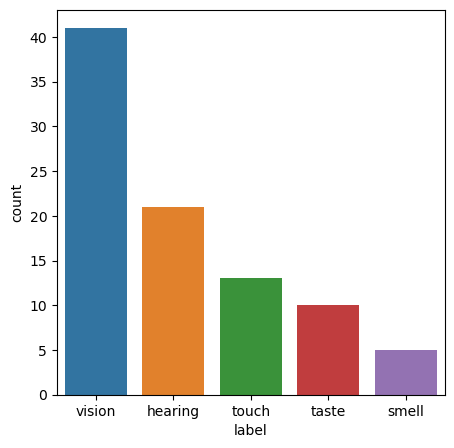

Final corpus for ./final_corpus/final_corpus_synesthesia.csv successfully written to csv file.
----------------------------------------------

Distribution of the labels in file ./final_corpus/final_shakespeare_synesthesia.csv
label
vision     12
touch       5
taste       5
hearing     5
smell       3
Name: count, dtype: int64


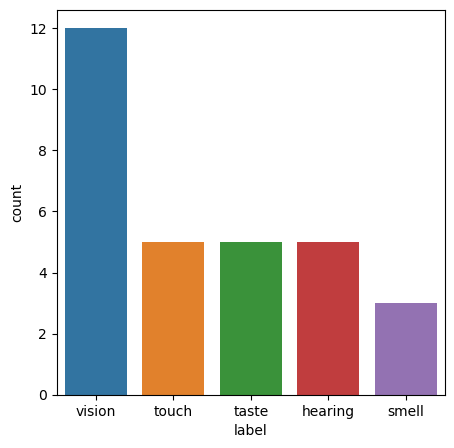

Final corpus for ./final_corpus/final_shakespeare_synesthesia.csv successfully written to csv file.
----------------------------------------------

Distribution of the labels in file ./final_corpus/final_dickinson_synesthesia.csv
label
vision     11
hearing     8
touch       6
taste       5
Name: count, dtype: int64


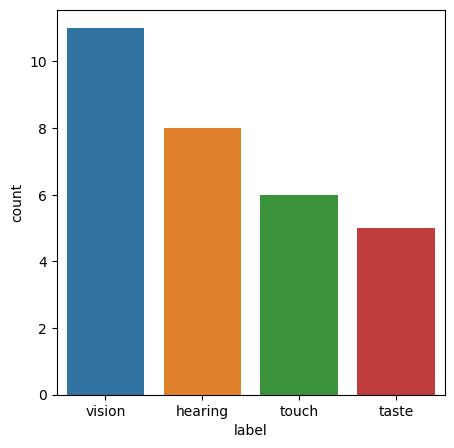

Final corpus for ./final_corpus/final_dickinson_synesthesia.csv successfully written to csv file.
----------------------------------------------

Distribution of the labels in file ./final_corpus/final_eliot_synesthesia.csv
label
vision     18
hearing     8
touch       2
smell       2
Name: count, dtype: int64


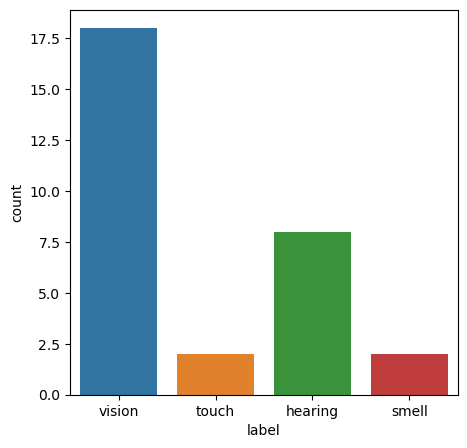

Final corpus for ./final_corpus/final_eliot_synesthesia.csv successfully written to csv file.
----------------------------------------------



In [17]:
final_corpus_df = get_final_corpus(all_instances, columns)
final_shakespeare = get_final_corpus(df_shakespeare, columns)
final_dickinson = get_final_corpus(df_dickinson, columns)
final_eliot = get_final_corpus(df_eliot, columns)

dataframes = [final_corpus_df, final_shakespeare, final_dickinson, final_eliot]
file_names = ['./final_corpus/final_corpus_synesthesia.csv', './final_corpus/final_shakespeare_synesthesia.csv', './final_corpus/final_dickinson_synesthesia.csv', './final_corpus/final_eliot_synesthesia.csv']

visualize_and_write_final_df(dataframes, file_names)